In [1]:
import pandas as pd

data = pd.read_csv("activity_data_with_props.csv")

           MW     LogP  HBA  HBD    PSA
0     475.936  3.56010    6    2  98.14
1     452.942  3.22500    5    2  83.56
2     354.793  3.49700    4    2  71.45
3     368.820  3.53950    4    2  71.45
4     450.878  4.04330    6    0  85.80
...       ...      ...  ...  ...    ...
1694  248.673  2.77400    3    2  66.91
1695  238.250  1.52948    4    1  78.67
1696  287.322  3.28768    3    1  65.78
1697  262.312  3.41600    2    1  41.99
1698  280.305  1.47150    5    1  89.27

[1699 rows x 5 columns]


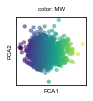

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(1.25,1.25))

features = ["MW", "LogP", "HBA", "HBD","PSA"]
input_data = data[features]
print(input_data)

X = PCA(n_components=2).fit_transform(input_data)

ax.scatter(X[:,0],X[:,1],c=data['MW'], s=10, alpha=.5)


ax.set_title(f"color: MW", fontsize=6, 
              fontfamily="arial")
ax.set_xlabel("PCA1", fontsize=6, 
              fontfamily="arial")
ax.set_ylabel("PCA2", fontsize=6, 
              fontfamily="arial")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels(ax.get_xticks(), fontsize=6, 
                   fontfamily="arial")
ax.set_yticklabels(ax.get_yticks(), fontsize=6, 
                   fontfamily="arial")

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("a.png", dpi=300, bbox_inches="tight", pad_inches=0.01)

In [20]:
lipinski_compliant_drugs = data.loc[(data["MW"] < 500) & (data["LogP"] < 5) & (data["HBD"] < 5) & (data["HBA"] < 10)]

In [21]:
print(len(lipinski_compliant_drugs))

1437


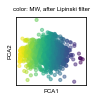

In [22]:
features = ["MW", "LogP", "HBA", "HBD","PSA"]
input_data = lipinski_compliant_drugs[features]

X2 = PCA(n_components=2).fit_transform(input_data)

fig, ax = plt.subplots(figsize=(1.25,1.25))


ax.scatter(X2[:,0],X2[:,1],c=input_data['MW'], s=10, alpha=.5)


ax.set_title(f"color: MW, after Lipinski filter", fontsize=6, 
              fontfamily="arial")
ax.set_xlabel("PCA1", fontsize=6, 
              fontfamily="arial")
ax.set_ylabel("PCA2", fontsize=6, 
              fontfamily="arial")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels(ax.get_xticks(), fontsize=6, 
                   fontfamily="arial")
ax.set_yticklabels(ax.get_yticks(), fontsize=6, 
                   fontfamily="arial")

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig("b.png", dpi=300, bbox_inches="tight", pad_inches=0.01)